In [2]:
#importing libraries
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [26]:
input_dir = "image-processing-files/test_images/"
output_dir = "image-processing-files/results/"


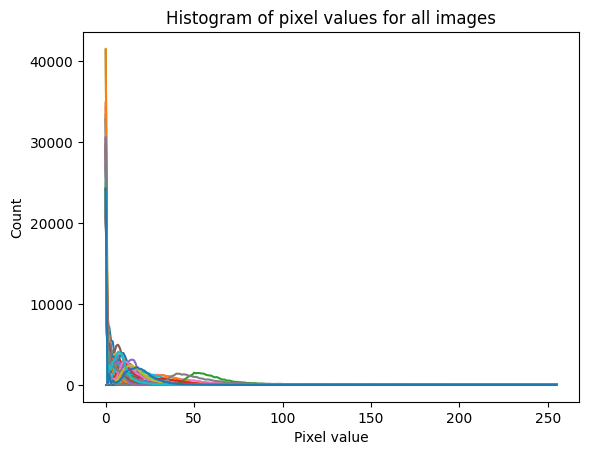

In [27]:
for filename in os.listdir(input_dir):
    img = cv2.imread(os.path.join(input_dir, filename))
    hist = cv2.calcHist([img], [0], None, [256], [0,256])
    plt.xlabel('Pixel value')
    plt.ylabel('Count')
    plt.title('Histogram of pixel values for all images')
    plt.plot(hist)
plt.savefig('Pixel values histogram')

In [25]:
# Plotting pixel values of all images
dir_path = "test_images"
for filename in os.listdir(dir_path):
    img = cv2.imread(os.path.join(dir_path, filename))
    hist = cv2.calcHist([img], [0], None, [256], [0,256])
    plt.xlabel('Pixel value')
    plt.ylabel('Count')
    plt.title('Histogram of pixel values for all images')
    plt.plot(hist)
plt.show()
plt.savefig('Pixel values histogram')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'test_images'

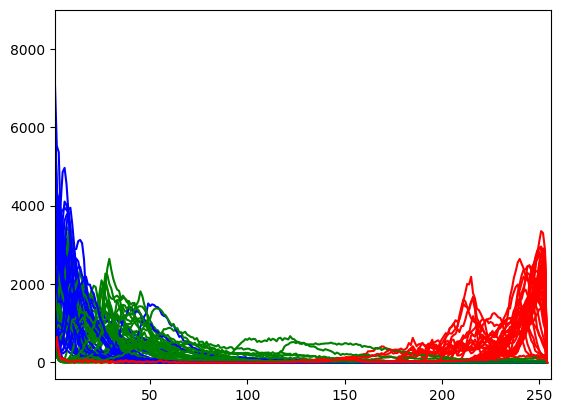

In [4]:
color = ('b','g','r')
for filename in os.listdir(dir_path):
    img = cv2.imread(os.path.join(dir_path, filename))
    if img is not None:  # Add this check
        for i,col in enumerate(color):
            histr = cv2.calcHist([img],[i],None,[255],[1,255])
            plt.plot(histr,color = col)
            plt.xlim([1,256])
        
plt.show()


In [10]:
im01 = cv2.imread('test_images/im01-RET029OD.jpg', cv2.IMREAD_COLOR)

# Convert the image to grayscale
gray = cv2.cvtColor(im01, cv2.COLOR_RGB2GRAY)

# Apply a threshold to create a binary image
_, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

# Detect circles using the Hough transform
circles = cv2.HoughCircles(thresh, cv2.HOUGH_GRADIENT, 1, minDist=50,
                           param1=200, param2=20, minRadius=0, maxRadius=0)

if circles is not None:
    # Extract the coordinates and radius of the circle
    x = int(circles[0][0][0])
    y = int(circles[0][0][1])
    r = int(circles[0][0][2])

    # Draw a circle around the detected circle
    cv2.circle(im01, (x, y), r, (0, 255, 0), 2)

    # Display the image
    cv2.imshow('image', im01)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Print the center coordinates and radius of the circle
    print('Circle center:', (x, y))
    print('Circle radius:', r)
else:
    print('No circles found in the image.')


Circle center: (186, 212)
Circle radius: 18


In [40]:
#inpainting finally works!!!!!
img = im01
mask = np.zeros_like(img[:,:,0])
center = (188, 212)
radius = 22
cv2.circle(mask, center, radius, 255, -1)

# Extract a similar section from the image
section = img[100:170, 150:220]


# Resize the mask to match the size of the image using interpolation
mask_resized = cv2.resize(mask, img.shape[:2][::-1], interpolation=cv2.INTER_LANCZOS4)

# Inpaint the corrupted region in the color image using the extracted section
inpainted_color = cv2.inpaint(img, mask_resized, 3, cv2.INPAINT_NS)

# Resize the section to match the size of the inpainted region
section_resized = cv2.resize(section, inpainted_color.shape[:2][::-1], interpolation=cv2.INTER_NEAREST)
cv2.imshow('image', section_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()
# Replace the inpainted region with the extracted section
output = inpainted_color.copy()
output[mask_resized != 0] = section_resized[mask_resized != 0]

# Display the output image
cv2.imshow('image', output)
cv2.waitKey(0)
cv2.destroyAllWindows()



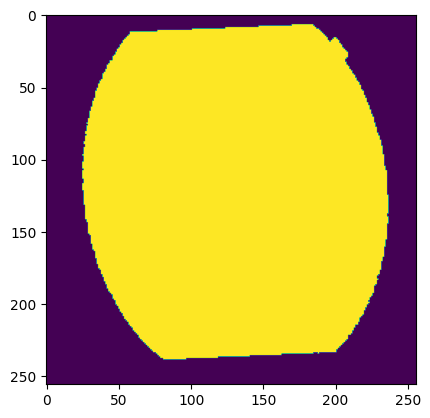

In [21]:
#dewarping and removing borders 1
img = output

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 30, 255, 0)

plt.imshow(thresh)
plt.show()

C:\Users\betht\AppData\Local\Temp\ipykernel_24068\284169297.py:11: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


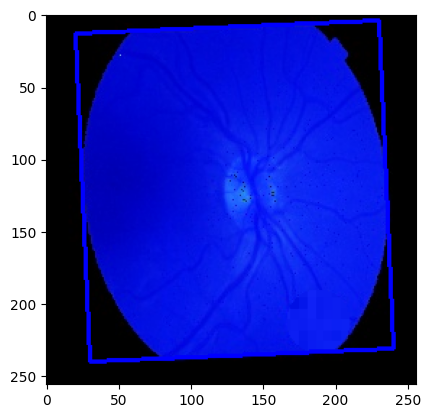

In [22]:
#dewarping and removing borders 2
# finding the contours
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE,
                               cv2.CHAIN_APPROX_SIMPLE)
  
# take the first contour
cnt = contours[0]

rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
box_img = cv2.drawContours(img, [box], 0, (0, 0, 255), 2)

# Show the result
plt.imshow(box_img)
plt.show()

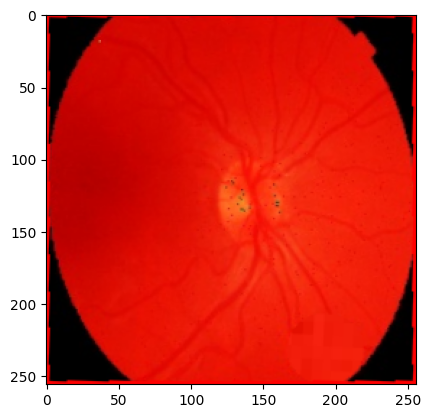

In [24]:
#dewarping and removing borders 3
img = output

extent = np.float32([[0,0], [255,0], [255,255], [0,255]])
bounds = np.float32(box)

M = cv2.getPerspectiveTransform(bounds, extent)

# Apply the transformation to the image
result = cv2.warpPerspective(img, M, (256, 256))
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
# Show the result
plt.imshow(result)
plt.show()